In [1]:
import numpy as np
from pbil import pbil
%pylab inline
%load_ext autoreload
%autoreload 2

Populating the interactive namespace from numpy and matplotlib


In [10]:
def one_max(vec):
    return vec.sum(axis=1)

def deceptive_one_max(vec):
    best = vec.shape[1] + 1
    if np.all(vec == 0):
        return best
    return vec.sum(axis=1)

def k_deceptive_one_max(K, vec):
    res = np.zeros(vec.shape[0])
    for i in range(K, vec.shape[1] + 1, K):
        ones = vec[:, i-K:i].sum(axis=1)
        ones[ones == 0] = K + 1
        res += ones
    return res

In [11]:

def draw_plots(scores_history, props_history, problem_title=None):
    fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15,4))
    if problem_title:
        fig.suptitle(problem_title, fontsize=20)
    ax1.plot(np.arange(len(scores_history)), scores_history)
    ax1.set_xlabel('Iteration')
    ax1.set_ylabel('Score')
    ax1.set_title('Progress')

    
    for x in np.array(props_history).T:
        ax2.plot(np.arange(x.size), x)
        ax2.set_title('Propabilities')
        ax2.set_xlabel('Iteration')
        ax2.set_ylabel('Propability')
    plt.show()
    

In [24]:
args = [
    {
        'f': one_max,
        'vec_size': 100,
        'iterations': 500,
        'theta1': 0.05,
        'theta2': 0.02,
        'theta3': 0.025, 
    },
    {
        'f': deceptive_one_max,
        'vec_size': 100,
        'iterations': 500,
        'theta1': 0.05,
        'theta2': 0.02,
        'theta3': 0.025,
    },
    {
        'f': lambda x: k_deceptive_one_max(10, x),
        'vec_size': 100,
        'iterations': 20000,
        'theta1': 0.05,
        'theta2': 0.1,
        'theta3': 0.1,
    },
]


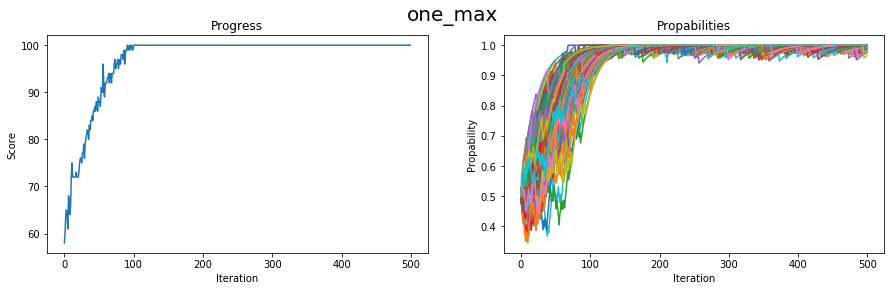

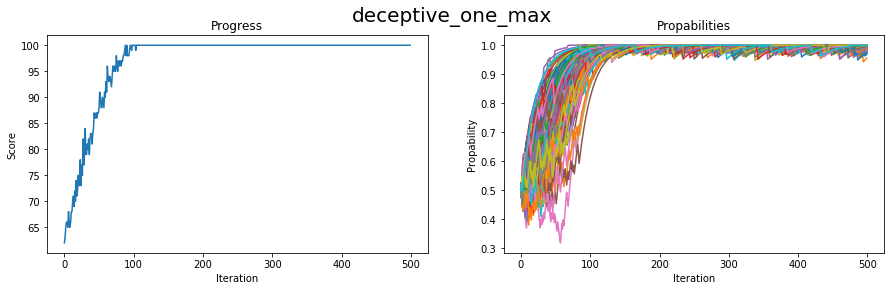

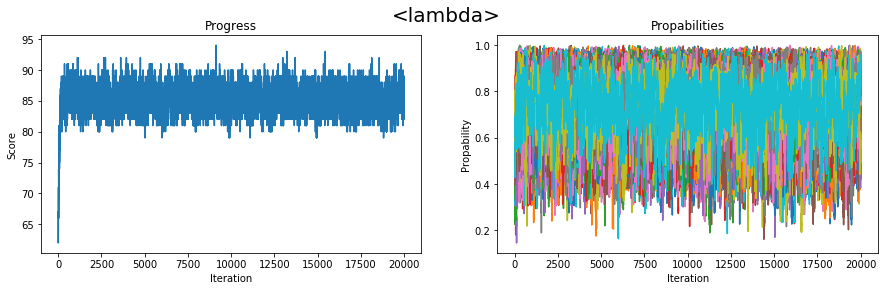

In [25]:
for x in args:
    res = pbil(**x)
    draw_plots(res[1], res[2], x['f'].__name__)